# 04. Computer Vision dengan MNIST Fashion

Menurut Wikipedia, **Computer Vision** adalah bidang ilmu komputer yang berfokus pada membangun mesin yang dapat memahami dan memproses gambar seperti manusia. Dalam hal ini, kita akan menggunakan dataset yang disebut **Fashion MNIST**. Fashion MNIST adalah dataset yang berisi gambar-gambar pakaian yang berbeda. Dataset ini dibuat untuk menggantikan dataset MNIST yang sudah sangat populer. Dataset MNIST berisi gambar angka yang ditulis tangan. Dataset Fashion MNIST memiliki format yang sama dengan MNIST, yaitu 28x28 pixel dengan 10 kelas yang berbeda. Kita akan menggunakan dataset ini untuk membangun model yang dapat memprediksi kelas dari gambar-gambar pakaian yang berbeda.

Untuk lebih mengetahui tentang dataset Fashion MNIST, silahkan kunjungi [situs resminya](https://github.com/zalandoresearch/fashion-mnist)

**Yang akan kita bahas**
1. **Torchvision**: adalah library yang berisi dataset dan model-model yang sudah dibuat untuk Computer Vision
2. **Memuat Dataset**: kita akan memuat dataset Fashion MNIST menggunakan Torchvision
3. **Mempersiapkan Dataset**: kita akan mempersiapkan dataset untuk digunakan dalam model dan memuatnya ke dalam DataLoader
4. **Membuat Model**: kita akan membuat model Neural Network untuk memprediksi kelas dari gambar-gambar pakaian
5. **Evaluasi Model**: kita akan mengevaluasi model yang sudah dibuat dengan menghitung akurasi dari model tersebut
6. **Memodifikasi Model - 1**: kita akan memodifikasi model yang sudah dibuat dengan menambahkan non-linearitas pada model
7. **Memodifikasi Model - CNN**: kita akan memodifikasi model yang sudah dibuat dengan menambahkan Convolutional Neural Network pada model
8. **Memperbandingkan Model**: kita akan membandingkan model yang dibuat di awal, dengan model yang sudah dimodifikasi
9. **Menyimpan dan memuat Model**: kita akan menyimpan model yang sudah dibuat dan memuatnya kembali

### Torchvision

Torchvision adalah sebuah package yang menyediakan dataset dan model untuk deep learning. Torchvision menyediakan dataset untuk FashionMNIST, MNIST, COCO, ImageNet, CIFAR, dan lain-lain. Torchvision juga menyediakan model untuk ImageNet, SqueezeNet, AlexNet, VGG, ResNet, Inception, dan lain-lain. Torchvision menyediakan fungsi untuk memuat dan memproses dataset, serta untuk melakukan augmentasi gambar.

Terdapat beberapa subpackage yang terdapat di dalam torchvision, yaitu:
| Package | Deskripsi |
| --- | --- |
| `torchvision.datasets` | menyediakan dataset untuk Computer Vision |
| `torchvision.models` | menyediakan model untuk Computer Vision |
| `torchvision.transforms` | menyediakan fungsi untuk melakukan transformasi pada gambar |
| `torchvision.utils` | menyediakan fungsi untuk membantu dalam visualisasi gambar |

Kita juga akan menggunakan `torch.utils.Dataset` dan `torch.utils.DataLoader` untuk memuat dataset dan mempersiapkannya untuk digunakan dalam model.

### Mengimpor Library

> **Catatan**: Pastikan kamu sudah menginstall library yang digunakan, seperti `torch`, `torchvision`, `matplotlib`, dan `torchmetrics`. Jika belum, silahkan install terlebih dahulu dengan menjalankan perintah `pip install torch torchvision matplotlib torchmetrics` di terminal.

In [1]:
## Import Library

# PyTorch
import torch
import torch.nn as nn

# Torchvision
import torchvision
from torchvision import datasets
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor

# Matplotlib
import matplotlib.pyplot as plt

# Torchmetrics
import torchmetrics

In [2]:
# Mengecek versi PyTorch dan Torchvision
print(f"PyTorch versi: {torch.__version__}")
print(f"Torchvision versi: {torchvision.__version__}")

PyTorch versi: 1.13.1
Torchvision versi: 0.14.1


### Device Agnostic

Seperti biasa, terlebih dahulu kita mengecek device yang tersedia dan memilih device yang akan digunakan untuk training model.

In [3]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("Tersedia GPU")
elif torch.backends.mps.is_available():
    device = torch.device("mps")
    print("Tersedia MPS Apple Silicon")
else:
    device = torch.device("cpu")
    print("Tersedia CPU")

Tersedia MPS Apple Silicon


In [4]:
# device = torch.device("cpu")

## Memuat Dataset

In [5]:
train_dataset = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None,
)

test_dataset = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None,
)

**Penjelasan:**
- `root`: lokasi dimana dataset akan disimpan
- `train`: jika bernilai `True`, maka dataset yang akan digunakan adalah dataset training. Jika bernilai `False`, maka dataset yang akan digunakan adalah dataset testing
- `download`: jika bernilai `True`, maka dataset akan diunduh dari internet. Jika bernilai `False`, maka dataset akan diunduh dari lokasi yang sudah ditentukan di `root`
- `transform`: fungsi yang akan digunakan untuk melakukan transformasi pada dataset. Dalam contoh di atas, kita menggunakan fungsi `ToTensor()` yang akan mengubah dataset menjadi tipe `torch.Tensor`
- `target_transform`: fungsi yang akan digunakan untuk melakukan transformasi pada label dataset. Dalam contoh di atas, kita tidak menggunakan fungsi ini

Selanjutnya, kita akan mencoba untuk menampilkan gambar-gambar dari dataset FashionMNIST

### Mengecek Detail dari Dataset

In [6]:
sample_image, sample_label = train_dataset[0]
print(f"Ukuran gambar: {sample_image.size()}")
print(f"Label: {sample_label}")

Ukuran gambar: torch.Size([1, 28, 28])
Label: 9


Dapat kita lihat bahwa ukuran gambar adalah `1, 28, 28`. Ini berarti bahwa gambar tersebut memiliki 1 channel, dan ukurannya adalah 28x28 pixel. Kita juga dapat melihat bahwa label dari gambar tersebut adalah `9`. Label tersebut merupakan label dari kelas dari gambar tersebut. Kita dapat melihat label dari kelas tersebut dengan menggunakan `dataset.classes`

In [7]:
classes = train_dataset.classes
print(f"Kelas: {classes}")

Kelas: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


Selanjutnya kita akan mengecek panjang dari dataset training dan dataset testing

In [8]:
print(f"Jumlah data training: {len(train_dataset)}")
print(f"Jumlah data testing: {len(test_dataset)}")

Jumlah data training: 60000
Jumlah data testing: 10000


Bagaimana representasi dari dataset tersebut dalam bentuk `torch.Tensor`? Mari kita coba untuk mengeceknya

In [9]:
print(sample_image)

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000,

Mari kita lihat contoh datasetnya secara visual

Text(0.5, 1.0, 'Ankle boot')

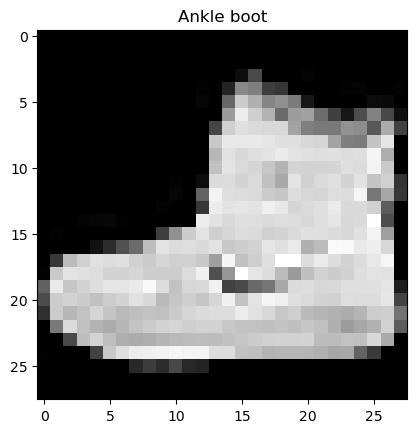

In [10]:
plt.imshow(sample_image.squeeze(), cmap="gray")
plt.title(classes[sample_label])

Gambar di atas merupakan contoh gambar dari dataset FashionMNIST. Gambar tersebut memiliki label `9`, yang berarti bahwa gambar tersebut merupakan gambar dari kelas `Ankle boot`. Mari coba lihat gambar lainnya

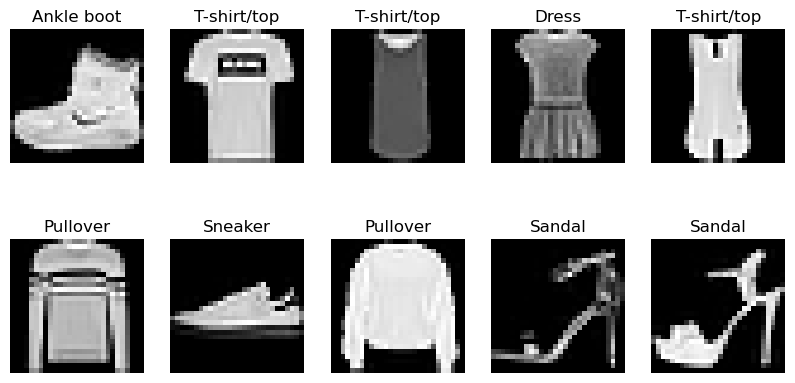

In [11]:
fig, ax = plt.subplots(2, 5, figsize=(10, 5))
for i in range(2):
    for j in range(5):
        ax[i, j].imshow(train_dataset[i * 5 + j][0].squeeze(), cmap="gray")
        ax[i, j].set_title(classes[train_dataset[i * 5 + j][1]])
        ax[i, j].axis("off")

**Mengapa gambar pada dataset MNIST Fashion terlihat pecah dan tidak terlihat menarik?**

Karena dataset MNIST Fashion merupakan dataset yang sederhana, dan digunakan untuk mempelajari dasar-dasar dari Computer Vision

## Mempersiapkan Dataset

### Dataloader

In [12]:
BATCH_SIZE = 32
train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=4)
test_dataloader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=4)

Kode di atas bertujuan untuk menyiapkan dataset ke dalam dataloader. Dataloader merupakan sebuah fungsi yang akan memuat dataset ke dalam model. Dataloader juga akan membagi dataset menjadi beberapa bagian, dan membagi dataset tersebut menjadi beberapa batch. Dataloader juga akan melakukan shuffle pada dataset, sehingga model yang dibuat tidak akan terbiasa dengan urutan data yang ada.

Dataloader memiliki beberapa parameter, yaitu:
| Parameter | Deskripsi |
| --- | --- |
| `batch_size` | ukuran dari batch yang akan digunakan |
| `shuffle` | jika bernilai `True`, maka dataset akan diacak sebelum dibagi menjadi batch. Jika bernilai `False`, maka dataset tidak akan diacak sebelum dibagi menjadi batch |
| `num_workers` | jumlah worker yang akan digunakan untuk memuat dataset |

<br>

> **Catatan**: Jika `num_workers` bernilai `0`, maka dataset akan di-load secara sequential. Jika `num_workers` bernilai `1`, maka dataset akan di-load secara parallel. Jika `num_workers` bernilai lebih dari `1`, maka dataset akan di-load secara parallel dengan jumlah worker yang ditentukan

> **Catatan**: Tips untuk menentukan jumlah worker yang akan digunakan adalah dengan mengecek jumlah CPU yang ada di komputer. Jumlah worker yang dapat digunakan  sama dengan jumlah core CPU yang ada di komputer

In [13]:
print(f"Jumlah batch training: {len(train_dataloader)}")
print(f"Jumlah batch testing: {len(test_dataloader)}")

Jumlah batch training: 1875
Jumlah batch testing: 313


### Iterasi Dataloader

Untuk mencoba satu buah batch dari dataset, kita dapat menggunakan fungsi `next()` pada dataloader. Fungsi `next()` akan mengembalikan satu buah batch dari dataset. Kita dapat menggunakan fungsi `next()` untuk mengecek satu buah batch dari dataset.

Contoh di bawah ini akan menampilkan satu buah batch dari dataset

Ukuran gambar: torch.Size([32, 1, 28, 28])
Ukuran label: torch.Size([32])


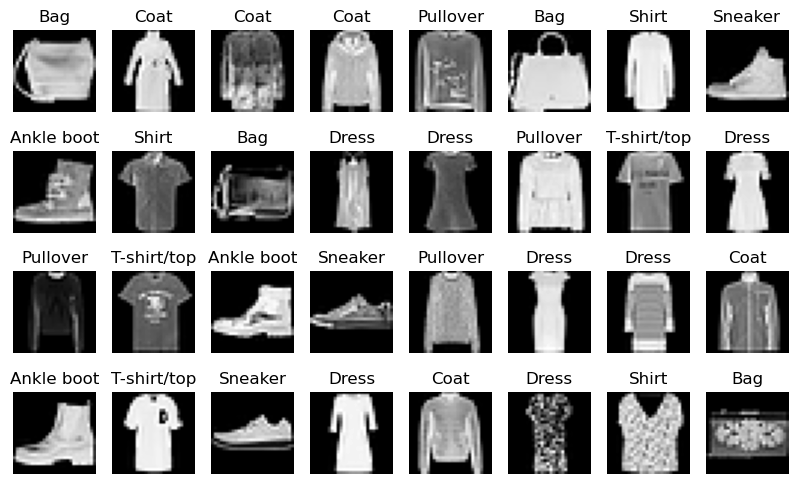

In [14]:
# iter dataloader

sample_img_iter, sample_label_iter = next(iter(train_dataloader))
print(f"Ukuran gambar: {sample_img_iter.size()}")
print(f"Ukuran label: {sample_label_iter.size()}")

# plot batch (batch = 32)
plt.figure(figsize=(10, 6))
for i in range(32):
    plt.subplot(4, 8, i + 1)
    plt.imshow(sample_img_iter[i].squeeze(), cmap="gray")
    plt.axis("off")
    plt.title(classes[sample_label_iter[i]])

## Membuat Model

### Kelas Model v0
Di tahap awal ini, kita akan membuat model yang sangat sederhana (dan dapat dipastikan bahwa kemampuannya jelek). 

In [15]:
class FashionMnistModel0(nn.Module):
    def __init__(self, input_size, num_classes, hidden_size):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(input_size, hidden_size),
            nn.Linear(hidden_size, num_classes),
        )

    def forward(self, x):
        return self.layer_stack(x)

**Penjelasan Model V0:**
- `nn.Flatten()`: fungsi yang digunakan untuk mengubah ukuran dari gambar menjadi 1 dimensi, sehingga yang tadinya memiliki ukuran `1, 28, 28` menjadi `784`
- `nn.Linear()`: fungsi yang digunakan untuk membuat layer linear. Fungsi ini memiliki 2 parameter, yaitu:
    - `in_features`: jumlah neuron pada layer sebelumnya
    - `out_features`: jumlah neuron pada layer yang akan dibuat
    dalam hal ini kita menggunakan dua buah nn.Linear, dimana yang pertama akan memiliki input sebesar ukuran gambar, dan output sebesar `hidden_size`. Sedangkan yang kedua akan memiliki input sebesar `hidden_size`, dan output sebesar `num_classes`

### Training Model V0

#### Instansiasi Model
Selanjutnya kita menginstansiasi model yang telah dibuat dengan nama `model_v0` dan memindahkan model tersebut ke dalam device yang telah ditentukan

In [16]:
torch.manual_seed(2023)
model_v0 = FashionMnistModel0(input_size=28 * 28, num_classes=len(classes), hidden_size=10)
model_v0.to(device)

FashionMnistModel0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

#### Loss, Optimizer, Accuracy

Selanjutnya kita akan membuat fungsi untuk menghitung loss, optimizer, dan accuracy dari model yang telah dibuat.
- `loss_fn` yang digunakan adalah `nn.CrossEntropyLoss()`. Fungsi ini digunakan untuk menghitung loss dari model yang telah dibuat. Fungsi ini akan menghitung loss dari model yang telah dibuat, dan mengembalikan nilai loss yang telah dihitung
- `optimizer` yang digunakan adalah `optim.SGD()`. Fungsi ini digunakan untuk menghitung nilai gradient dari model yang telah dibuat. Fungsi ini akan menghitung nilai gradient dari model yang telah dibuat, dan mengembalikan nilai gradient yang telah dihitung
- `accuracy` yang digunakan adalah dari library `torchmetrics` bernama `Accuracy`. Fungsi ini digunakan untuk menghitung nilai akurasi dari model yang telah dibuat. Fungsi ini akan menghitung nilai akurasi dari model yang telah dibuat, dan mengembalikan nilai akurasi yang telah dihitung

`torchmetrics.Accuracy` memiliki beberapa parameter yang dapat kamu lihat di [dokumentasi](https://torchmetrics.readthedocs.io/en/stable/classification/accuracy.html), dalam hal ini ada dua parameter yang digunakan:
- `num_classes`: jumlah kelas yang ada pada dataset
- `task` : jenis task yang akan digunakan. Dalam hal ini, karena terdapat banyak kelas, maka kita menggunakan `task='multiclass'`

In [17]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_v0.parameters(), lr=0.1)
accuracy = torchmetrics.Accuracy(task="multiclass", num_classes=len(classes))

#### Membuat Fungsi Penghitung Waktu Train

Supaya kita dapat mengetahui berapa lama waktu yang dibutuhkan untuk melakukan training, kita akan membuat fungsi untuk menghitung waktu training. Fungsi ini akan menghitung waktu training, dan mengembalikan waktu training yang telah dihitung

In [18]:
from timeit import default_timer as timer
def get_print_time(start: float, end: float, device: torch.device = None):
    total_time = end - start
    print(f"Total waktu: {total_time:.2f} detik")
    return total_time

#### Training Loop

Selanjutnya kita akan membuat fungsi untuk melakukan training loop. Fungsi ini akan melakukan training loop, dan mengembalikan nilai loss dan akurasi dari model yang telah dibuat

In [19]:
train_start_time = timer()
EPOCHS = 5

for epoch in range(EPOCHS):

    # training
    train_loss = 0

    # enumerate dataloader
    for batch_idx, (data, target) in enumerate(train_dataloader):
        model_v0.train()
        data, target = data.to(device), target.to(device)

        y_pred = model_v0(data)

        # hitung loss
        loss = loss_fn(y_pred, target)
        train_loss += loss.item()

        # backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    train_loss = train_loss / len(train_dataloader)

    # testing
    test_loss, test_acc = 0, 0

    model_v0.eval()
    with torch.inference_mode():
        for data, target in test_dataloader:
            data, target = data.to(device), target.to(device)

            y_pred = model_v0(data)

            # hitung loss
            loss = loss_fn(y_pred, target)
            test_loss += loss.item()

            # hitung akurasi
            test_acc += accuracy(y_pred.cpu(), target.cpu())

    test_loss = test_loss / len(test_dataloader)
    test_acc = test_acc / len(test_dataloader)

    print(
        f"Epoch: {epoch + 1}/{EPOCHS} | Train Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f} | Test Acc: {test_acc:.4f}"
    )

train_end_time = timer()
total_train_time_model_v0 = get_print_time(train_start_time, train_end_time, device=str(next(model_v0.parameters()).device))

Epoch: 1/5 | Train Loss: 0.5929 | Test Loss: 0.5221 | Test Acc: 0.8138
Epoch: 2/5 | Train Loss: 0.4766 | Test Loss: 0.4905 | Test Acc: 0.8304
Epoch: 3/5 | Train Loss: 0.4556 | Test Loss: 0.4955 | Test Acc: 0.8282
Epoch: 4/5 | Train Loss: 0.4436 | Test Loss: 0.4628 | Test Acc: 0.8374
Epoch: 5/5 | Train Loss: 0.4366 | Test Loss: 0.4710 | Test Acc: 0.8360
Total waktu: 42.66 detik


## Evaluasi Model

Berikutnya, kita akan mencoba untuk melakukan inferensi terhadap model yang telah dibuat dan menghitung nilai akurasi dari model tersebut

Test Accuracy: 0.8438


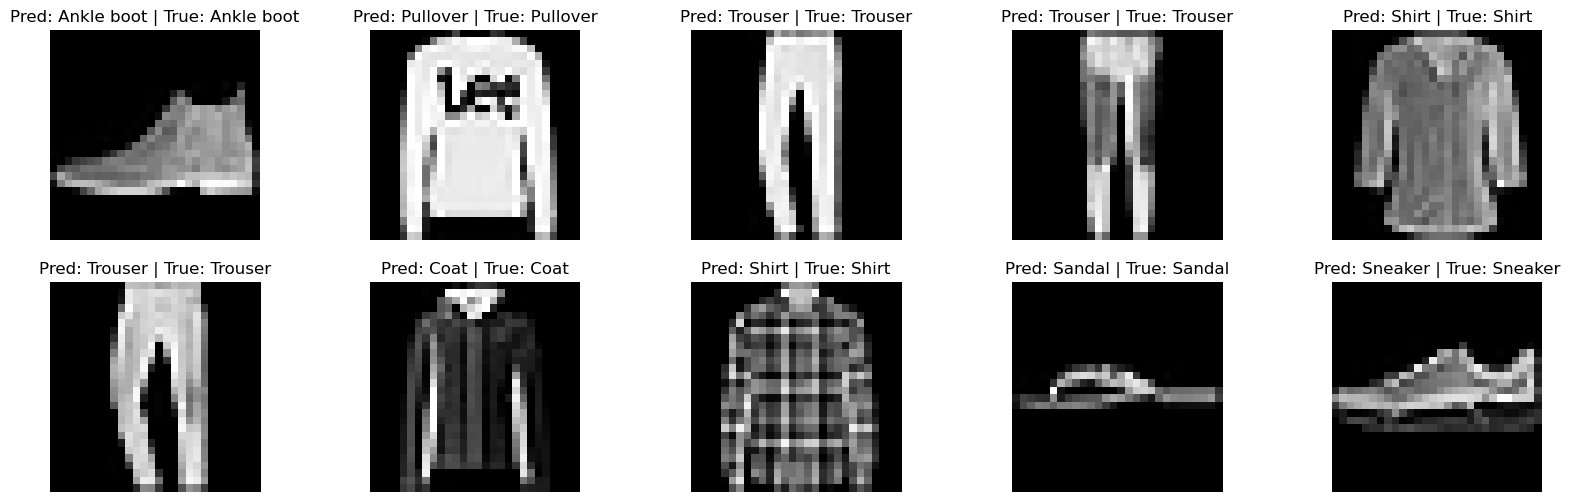

In [20]:
# single inference
model_v0.eval()
with torch.inference_mode():
    data, target = next(iter(test_dataloader))
    data, target = data.to(device), target.to(device)
    
    y_pred = model_v0(data)
    y_pred = torch.argmax(y_pred, dim=1)
    
    # visualisasi 10 data pertama
    plt.figure(figsize=(20, 6))
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(data[i].cpu().squeeze(), cmap="gray")
        plt.axis("off")
        plt.title(f"Pred: {classes[y_pred[i]]} | True: {classes[target[i]]}")

    # print metric
    acc = accuracy(y_pred.cpu(), target.cpu())
    print(f"Test Accuracy: {acc:.4f}")

dapat kita lihat bahwa model yang telah dibuat memiliki nilai akurasi sebesar 0.84, yang artinya model yang telah dibuat memiliki kemampuan yang cukup baik untuk melakukan klasifikasi gambar. Namun, kita akan mencoba untuk membuat model yang lebih baik dari model yang telah dibuat

## Membuat Model V1

Selanjutnya, kita akan mencoba untuk membuat model yang lebih baik dari model yang telah dibuat. Model yang akan dibuat adalah model yang memiliki arsitektur yang sama dengan model yang telah dibuat, namun dengan penambahan `nn.ReLU()` pada setiap layer yang telah dibuat.

In [21]:
class FashionMnistModel1(nn.Module):
    def __init__(self, input_size, num_classes, hidden_size):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, num_classes),
            nn.ReLU(),
        )

    def forward(self, x):
        return self.layer_stack(x)

### Menginstansiasi Model

In [22]:
model_v1 = FashionMnistModel1(input_size=28 * 28, num_classes=len(classes), hidden_size=10)
model_v1.to(device)

FashionMnistModel1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)

### Mengatur Loss, Optimizer, dan Accuracy

In [23]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_v1.parameters(), lr=0.1)
accuracy = torchmetrics.Accuracy(task="multiclass", num_classes=len(classes))

### Membuat Fungsi Train Loop

Agar lebih praktis dan memudahkan kita untuk melakukan training, kita akan membuat fungsi untuk melakukan training loop. Fungsi ini akan melakukan training loop, dan mengembalikan nilai loss dan akurasi dari model yang telah dibuat **Pada dasarnya, fungsi ini sama dengan cara kita melakukan training pada model_v0.**

In [25]:
def run_train(model, train_dataloader, test_dataloader, loss_fn, optimizer, accuracy, device, epochs=5):
    train_start_time = timer()
    for epoch in range(epochs):

        # training
        train_loss = 0

        # enumerate dataloader
        for batch_idx, (data, target) in enumerate(train_dataloader):
            model.train()
            data, target = data.to(device), target.to(device)

            y_pred = model(data)

            # hitung loss
            loss = loss_fn(y_pred, target)
            train_loss += loss.item()

            # backward
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        train_loss = train_loss / len(train_dataloader)

        # testing
        test_loss, test_acc = 0, 0
        model.eval()
        with torch.inference_mode():
            for data, target in test_dataloader:
                data, target = data.to(device), target.to(device)

                y_pred = model(data)

                # hitung loss
                loss = loss_fn(y_pred, target)
                test_loss += loss.item()

                # hitung akurasi
                test_acc += accuracy(y_pred.cpu(), target.cpu())

        test_loss = test_loss / len(test_dataloader)
        test_acc = test_acc / len(test_dataloader)

        # print
        print(
            f"Epoch: {epoch + 1}/{epochs} | Train Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f} | Test Acc: {test_acc:.4f}"
        )

    train_end_time = timer()
    total_train_time = get_print_time(train_start_time, train_end_time, device=str(next(model.parameters()).device))
    print(f"Total waktu training: {total_train_time:.2f} detik")

### Melakukan Training Model V1

In [53]:
# train
run_train(model_v1, train_dataloader, test_dataloader, loss_fn, optimizer, accuracy, device, epochs=5)

Epoch: 1/5 | Train Loss: 0.6597 | Test Loss: 0.7124 | Test Acc: 0.8009
Epoch: 2/5 | Train Loss: 0.6597 | Test Loss: 0.7124 | Test Acc: 0.8009
Epoch: 3/5 | Train Loss: 0.6597 | Test Loss: 0.7124 | Test Acc: 0.8009
Epoch: 4/5 | Train Loss: 0.6597 | Test Loss: 0.7124 | Test Acc: 0.8009
Epoch: 5/5 | Train Loss: 0.6597 | Test Loss: 0.7124 | Test Acc: 0.8009
Total waktu: 50.65 detik
Total waktu training: 50.65 detik


**Pembahasan:**
Dengan menggunakan tambahan layer `nn.ReLU()`, kita dapat melihat bahwa nilai akurasi dari model yang telah dibuat menjadi 0.8009 dari yang sebelumnya 0.8360. `nn.ReLU()` tidak secara signifikan meningkatkan nilai akurasi dari model yang telah dibuat, namun dengan menggunakan `nn.ReLU()` kita dapat menghindari terjadinya overfitting pada model yang telah dibuat.

## Membuat Model V2

Selanjutnya kita akan membuat model yang lebih baik dari model yang telah dibuat. Pada model versi 2, kita akan menggunakan Convolutional Neural Network (CNN) untuk melakukan klasifikasi gambar. Sehingga, komposisi layer akan menjadi:
- Block 1: `nn.Conv2d` -> `nn.ReLU` -> `nn.Conv2d` -> `nn.ReLU` -> `nn.MaxPool2d`
- Block 2: `nn.Conv2d` -> `nn.ReLU` -> `nn.Conv2d` -> `nn.ReLU` -> `nn.MaxPool2d`
- Classifier: `nn.Flatten` -> `nn.Linear`

Mari kita buat class `ModelV2` untuk membuat model versi 2

In [27]:
class FashionMnistModel2(nn.Module):
    def __init__(
        self,
        input_size,
        hidden_size,
        output_size,
    ):
        super().__init__()
        
        # BLOCK 1
        self.block1 = nn.Sequential(
            nn.Conv2d(in_channels=input_size, out_channels=hidden_size, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_size, out_channels=hidden_size, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )

        # BLOCK 2
        self.block2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_size, out_channels=hidden_size, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_size, out_channels=hidden_size, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )

        # BLOCK 3 (CLASSIFIER)
        self.block3 = nn.Sequential(
            nn.Flatten(),
            nn.Linear(hidden_size * 7 * 7, output_size),
        )

    def forward(self, x):
        x = self.block1(x)
        x = self.block2(x)
        x = self.block3(x)
        return x

### Instansiasi Model dan Mengatur Device

Setelah itu, seperti biasa, model yang telah diinstansiasi, dikirimkan kembali ke device dengan cara
`model_v2.to(device)`

In [28]:
model_v2 = FashionMnistModel2(input_size=1, hidden_size=10, output_size=len(classes))
model_v2.to(device)

FashionMnistModel2(
  (block1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block3): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

### Menjalankan Training Model V2

Selanjutnya, kita coba untuk menjalankan training pada model V2

In [29]:
# train Model v2
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_v2.parameters(), lr=0.1)
accuracy = torchmetrics.Accuracy(task="multiclass", num_classes=len(classes))

run_train(model_v2, train_dataloader, test_dataloader, loss_fn, optimizer, accuracy, device, epochs=5)

Epoch: 1/5 | Train Loss: 0.8960 | Test Loss: 0.4002 | Test Acc: 0.8572
Epoch: 2/5 | Train Loss: 0.3674 | Test Loss: 0.3634 | Test Acc: 0.8700
Epoch: 3/5 | Train Loss: 0.3246 | Test Loss: 0.3386 | Test Acc: 0.8825
Epoch: 4/5 | Train Loss: 0.2965 | Test Loss: 0.3156 | Test Acc: 0.8864
Epoch: 5/5 | Train Loss: 0.2805 | Test Loss: 0.3030 | Test Acc: 0.8916
Total waktu: 64.74 detik
Total waktu training: 64.74 detik


Dapat kita lihat, bahwa model V2 memiliki nilai akurasi sebesar 0.89. Dengan menggunakan CNN, kita dapat meningkatkan nilai akurasi dari model yang telah dibuat. Selanjutnya kita akan membandingkan ketiga model yang telah kita buat

## Membandingkan Model V0, V1, dan V2

Untuk mempermudah kita dalam menjalankan testing, kita terlebih dahulu membuat fungsi test yang secara umum sama dengan validasi yang kita jalankan ketika melakukan training.

In [30]:
def test_run(model, test_dataloader, device, accuracy, loss_fn):
    model.eval()
    with torch.inference_mode():
        test_loss, test_acc = 0, 0
        for data, target in test_dataloader:
            data, target = data.to(device), target.to(device)

            y_pred = model(data)

            # hitung loss
            loss = loss_fn(y_pred, target)
            test_loss += loss.item()

            # hitung akurasi
            test_acc += accuracy(y_pred.cpu(), target.cpu())

        test_loss = test_loss / len(test_dataloader)
        test_acc = test_acc / len(test_dataloader)

    return test_loss, test_acc

Lalu kita menjalankan ketiga model yang telah kita buat untuk melakukan testing

In [31]:
# test Model v0
test_loss_v0, test_acc_v0 = test_run(model_v0, test_dataloader, device, accuracy, loss_fn)
print(f"Test Loss v0: {test_loss_v0:.4f} | Test Acc v0: {test_acc_v0:.4f}")

# test Model v1
test_loss_v1, test_acc_v1 = test_run(model_v1, test_dataloader, device, accuracy, loss_fn)
print(f"Test Loss v1: {test_loss_v1:.4f} | Test Acc v1: {test_acc_v1:.4f}")

# test Model v2
test_loss_v2, test_acc_v2 = test_run(model_v2, test_dataloader, device, accuracy, loss_fn)
print(f"Test Loss v2: {test_loss_v2:.4f} | Test Acc v2: {test_acc_v2:.4f}")

Test Loss v0: 0.4710 | Test Acc v0: 0.8360
Test Loss v1: 0.7124 | Test Acc v1: 0.8009
Test Loss v2: 0.3030 | Test Acc v2: 0.8916


Dapat kita amati bahwa model v2 memiliki hasil yang paling baik dibandingkan model v0 dan model v1. Selanjutnya, kita akan mencoba membuat confusion matrix untuk model v2, untuk melihat seberapa tepat model tersebut dalam melakukan klasifikasi gambar

### Membuat Confusion Matrix

Untuk membuat confusion matrix, kita membutuhkan library `torchmetrics` dan `mlxtend`. Jika kamu belum menginstallnya, silahkan lakukan instalasi dengan menggunakan `pip` atau `conda`.

```
pip install torchmetrics mlxtend
```

atau dengan conda

```
conda install -c conda-forge torchmetrics mlxtend
```


In [40]:
try:
    from torchmetrics import ConfusionMatrix
    from mlxtend.plotting import plot_confusion_matrix
except:
    !pip install torchmetrics
    !pip install mlxtend
    from torchmetrics import ConfusionMatrix
    from mlxtend.plotting import plot_confusion_matrix

Selanjutnya, kita melakukan testing pada model v2, dan menyimpan hasil prediksi dan label dari testing tersebut untuk selanjutnya kita plot dalam confusion matrix.

In [35]:
y_preds = []
with torch.inference_mode():
    model_v2.eval()
    for data, target in test_dataloader:
        data, target = data.to(device), target.to(device)
        y_pred = model_v2(data)
        y_preds.append(y_pred.cpu())

y_preds = torch.cat(y_preds, dim=0)

In [46]:
confmat = ConfusionMatrix(num_classes=len(classes), task="multiclass")
confmat_tensor = confmat(y_preds, test_dataset.targets)

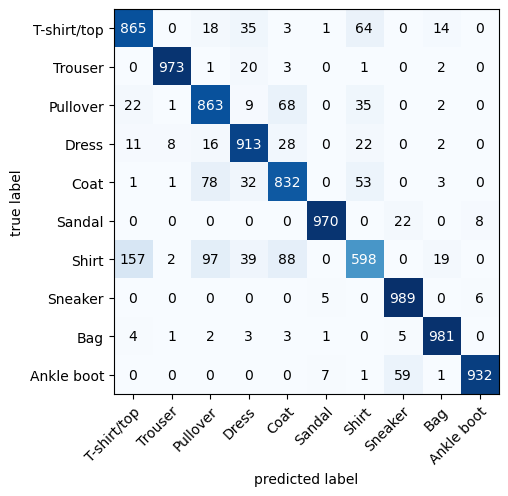

In [44]:
fig, ax = plot_confusion_matrix(conf_mat=confmat_tensor.numpy(), class_names=classes, figsize=(9, 5))

Dapat kita lihat pada confusion matrix diatas, masih terdapat beberapa kesalahan prediksi yang dilakukan oleh model v2. Namun, kesalahan prediksi tersebut masih dapat diterima, karena model v2 memiliki nilai akurasi sebesar 0.89, yang artinya model v2 memiliki kemampuan yang cukup baik untuk melakukan klasifikasi gambar.

Sumbu X pada confusion matrix diatas adalah label dari gambar, sedangkan sumbu Y adalah hasil prediksi dari model. Prediksi yang tepat adalah prediksi yang berada di diagonal, sedangkan prediksi yang salah adalah prediksi yang berada di luar diagonal. Misalnya saja, kesalahan prediksi terbesar terdapat pada kelas Shirt, dimana model v2 salah memprediksi kelas Shirt menjadi kelas T-shirt/top.

## Menyimpan dan Memuat Model

Model yang sudah di-training selanjutnya dapat disimpan untuk suatu saat dapat dimuat ulang, berikut adalah cara untuk menyimpan dan memuat model yang telah dibuat.

### Menyimpan Model

In [48]:
from pathlib import Path

MODEL_PATH = Path("../assets/saved_model/")
MODEL_NAME = "save_model_v2_best.pth"
MODEL_FULL_PATH = MODEL_PATH / MODEL_NAME

# check if directory exist
if not MODEL_PATH.exists():
    MODEL_PATH.mkdir(parents=True)
    print(f"Direktori tidak ditemukan, membuat direktori baru di {MODEL_PATH}")

print(f"Menyimpan model ke {MODEL_FULL_PATH}")
torch.save(model_v2.state_dict(), MODEL_FULL_PATH)

Menyimpan model ke ../assets/saved_model/save_model_v2_best.pth


**Penjelasan:**
- `Path("../assets/saved_model/")` merupakan lokasi dimana model akan disimpan
- `MODEL_NAME` merupakan nama dari model yang akan disimpan
- `MODEL_FULL_PATH` merupakan lokasi lengkap dari model yang akan disimpan
- `model_v2.state_dict()` merupakan state dari model yang akan disimpan. PyTorch menyarankan untuk menyimpan state dari model, bukan model itu sendiri. Hal ini dikarenakan, ketika model disimpan, model tersebut akan disimpan beserta dengan optimizer dan scheduler yang digunakan. Ketika model di-load, model tersebut akan di-load beserta dengan optimizer dan scheduler yang digunakan. Hal ini dapat menyebabkan error ketika model di-load di device yang berbeda. Oleh karena itu, PyTorch menyarankan untuk menyimpan state dari model, bukan model itu sendiri.
- `torch.save(model_v2.state_dict(), MODEL_FULL_PATH)` merupakan fungsi untuk menyimpan model

### Memuat Model

Selanjutnya kita dapat memuat model dengan perintah `load_state_dict`. Namun sebelumnya, kita perlu membuat model yang sama dengan model yang telah disimpan. Misalnya, jika model yang disimpan adalah model v2, maka kita perlu membuat arsitektur atau layer model v2 yang sama dengan model yang telah disimpan.

In [49]:
loaded_model_2 = FashionMnistModel2(input_size=1, hidden_size=10, output_size=len(classes))

Setelahnya, baru kita dapat memanggil perintah `load_state_dict` dengan memberikan path lokasi model yang tersimpan

In [50]:
loaded_model_2.load_state_dict(torch.load(MODEL_FULL_PATH))
loaded_model_2.to(device)

FashionMnistModel2(
  (block1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block3): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

Terakhir, kita coba melakukan testing pada model yang telah dimuat ulang

In [52]:
torch.manual_seed(1234)

try_load_loss, try_load_acc = test_run(loaded_model_2, test_dataloader, device, accuracy, loss_fn)
print(f"Test Loss: {try_load_loss:.4f} | Test Acc: {try_load_acc:.4f}")

Test Loss: 0.3030 | Test Acc: 0.8916
